## Subsampling analysis

subsample the number of inidvidualas/RNA-seq datasets and look at how number of signals changes

In [6]:
import pandas as pd
import numpy as np
import os
import yaml
import seaborn as sns
import matplotlib.pyplot as plt


prefix = '/home/klawren/oak/pcqtls'

### create the subsampled expression and covar files
this only needs to be run once

In [7]:
# get outputs from a config file
config_path= f'{prefix}/config/proteincoding_main.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

tissue_id_path = config['tissue_id_path']
clusters_dir = config['clusters_dir']
expression_dir = config['expression_dir']
covariates_dir = config['covariates_dir']

tissue_df = pd.read_csv(f"{prefix}/{tissue_id_path}", header=0)
tissue_ids = list(tissue_df['Tissue'])
tissue_id = 'Cells_Cultured_fibroblasts'

In [8]:
num_samples = []
for tissue_id in tissue_ids:
        covariates_df = pd.read_csv(f'{prefix}/{covariates_dir}/{tissue_id}.v8.covariates.txt', sep='\t', index_col=0).T
        num_samples.append(len(covariates_df.index))

In [12]:
pd.DataFrame({'samples':num_samples, 'tissue':tissue_ids})

,samples,tissue
0,581,Adipose_Subcutaneous
1,469,Adipose_Visceral_Omentum
2,584,Artery_Tibial
3,483,Cells_Cultured_fibroblasts
4,497,Esophagus_Mucosa
5,465,Esophagus_Muscularis
6,515,Lung
7,706,Muscle_Skeletal
8,532,Nerve_Tibial
9,517,Skin_Not_Sun_Exposed_Suprapubic


In [25]:
t = pd.read_parquet('output/proteincoding_main/control_eqtl/Adipose_Subcutaneous/Adipose_Subcutaneous.v8.cluster_genes.cis_qtl_pairs.chr22.parquet')
t.rename(columns={'phenotype_id':'gene_id', 'af':'maf'}, inplace=True)
t['snp'] = t['variant_id']

In [26]:
t.to_csv('output/proteincoding_main/control_eqtl/Adipose_Subcutaneous/Adipose_Subcutaneous.v8.cluster_genes.cis_qtl_pairs.chr22.tsv.gz', sep='\t', compression='gzip', index=False)

In [27]:
pd.read_csv('output/proteincoding_main/control_eqtl/Adipose_Subcutaneous/Adipose_Subcutaneous.v8.cluster_genes.cis_qtl_pairs.chr22.tsv.gz', sep='\t')

,gene_id,variant_id,start_distance,end_distance,maf,ma_samples,ma_count,pval_nominal,slope,slope_se,snp
0,ENSG00000015475.18_ENSG00000099968.17_e_ENSG00...,chr22_16628892_T_C_b38,-999963,-1145878,0.019793,23,23,0.237375,0.011875,0.010038,chr22_16628892_T_C_b38
1,ENSG00000015475.18_ENSG00000099968.17_e_ENSG00...,chr22_16628911_CTTG_C_b38,-999944,-1145859,0.041308,46,48,0.917380,-0.000696,0.006708,chr22_16628911_CTTG_C_b38
2,ENSG00000015475.18_ENSG00000099968.17_e_ENSG00...,chr22_16629375_T_A_b38,-999480,-1145395,0.252151,258,293,0.301020,0.003328,0.003215,chr22_16629375_T_A_b38
3,ENSG00000015475.18_ENSG00000099968.17_e_ENSG00...,chr22_16629512_C_G_b38,-999343,-1145258,0.907057,98,108,0.851367,-0.000843,0.004495,chr22_16629512_C_G_b38
4,ENSG00000015475.18_ENSG00000099968.17_e_ENSG00...,chr22_16629863_T_G_b38,-998992,-1144907,0.244406,239,284,0.716316,0.001140,0.003135,chr22_16629863_T_G_b38
...,...,...,...,...,...,...,...,...,...,...,...
358636,ENSG00000100312.10_ENSG00000251322.7_e_ENSG000...,chr22_50806958_C_CGTCTCTGCGCCGCCGGGGACGTGT_b38,132543,68762,0.017212,19,20,0.155096,0.014599,0.010253,chr22_50806958_C_CGTCTCTGCGCCGCCGGGGACGTGT_b38
358637,ENSG00000100312.10_ENSG00000251322.7_e_ENSG000...,chr22_50807078_C_A_b38,132663,68882,0.023256,26,26,0.579875,-0.005382,0.009716,chr22_50807078_C_A_b38
358638,ENSG00000100312.10_ENSG00000251322.7_e_ENSG000...,chr22_50807681_C_A_b38,133266,69485,0.010601,12,12,0.112747,0.022803,0.014353,chr22_50807681_C_A_b38
358639,ENSG00000100312.10_ENSG00000251322.7_e_ENSG000...,chr22_50807702_A_G_b38,133287,69506,0.029260,34,34,0.807826,0.002031,0.008345,chr22_50807702_A_G_b38


465

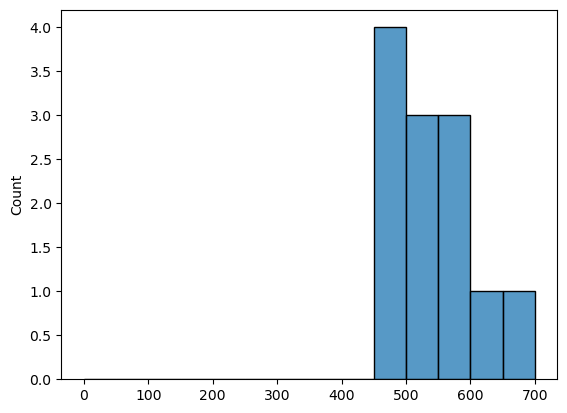

In [9]:
sns.histplot(num_samples, bins=np.arange(0, max(num_samples), 50))
min(num_samples)

In [10]:
num_samples

[581, 469, 584, 483, 497, 465, 515, 706, 532, 517, 605, 574, 670]

In [5]:
# minimum of 300 in each tissue, I'll do 100, 200, 300

for num_samples in [80, 85, 95]:
    output_dir = f'{prefix}/data/processed/subsampling/{num_samples}'
    os.mkdir(output_dir)
    os.mkdir(f'{output_dir}/covariates/')
    os.mkdir(f'{output_dir}/normalized_expression/')

    for tissue_id in tissue_ids:
        # load in each expression and covariates files
        expression_df = pd.read_csv(f'{prefix}/{expression_dir}/{tissue_id}.v8.normalized_expression.bed', sep='\t')
        covariates_df = pd.read_csv(f'{prefix}/{covariates_dir}/{tissue_id}.v8.covariates.txt', sep='\t', index_col=0).T

        if len(covariates_df.index) > num_samples:
            selected_samples = covariates_df.index[:num_samples].values

            # write out first x as a subset
            sub_expression = expression_df[np.concatenate([expression_df.columns[:4].values, selected_samples])]
            sub_expression.to_csv(f'{output_dir}/normalized_expression/{tissue_id}.v8.normalized_expression.bed', sep='\t', index=None)

            sub_covar = covariates_df.loc[selected_samples]
            sub_covar.T.to_csv(f'{output_dir}/covariates/{tissue_id}.v8.covariates.txt', sep='\t')

In [ ]:
# try with a random selection of 100 rather than the first 100
for num_samples in [100]:
    output_dir = f'{prefix}/data/processed/subsampling/{num_samples}_rand'
    try:
        os.mkdir(output_dir)
        os.mkdir(f'{output_dir}/covariates/')
        os.mkdir(f'{output_dir}/normalized_expression/')
    except FileExistsError:
        pass

    for tissue_id in tissue_ids:
        # load in each expression and covariates files
        expression_df = pd.read_csv(f'{prefix}/{expression_dir}/{tissue_id}.v8.normalized_expression.bed', sep='\t')
        covariates_df = pd.read_csv(f'{prefix}/{covariates_dir}/{tissue_id}.v8.covariates.txt', sep='\t', index_col=0).T

        selected_samples = pd.Series(covariates_df.index.values).sample(num_samples)

        sub_expression = expression_df[np.concatenate([expression_df.columns[:4].values, selected_samples])]
        sub_expression.to_csv(f'{output_dir}/normalized_expression/{tissue_id}.v8.normalized_expression.bed', sep='\t', index=None)

        sub_covar = covariates_df.loc[selected_samples]
        sub_covar.T.to_csv(f'{output_dir}/covariates/{tissue_id}.v8.covariates.txt', sep='\t')